In [1]:
# 引進相關套件
import requests
from io import StringIO
import pandas as pd
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
# 資料日期
date1 = '20201120'
stockNo = '2330'
# 網址
url= 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date={}&stockNo={}'.format(date1, stockNo)


In [3]:
# 送出要求，並取得回應資料
response = requests.post(url)


In [4]:
clean_data=[]
for row in response.text.split('\n'):
    fields=row.split('",')
    if len(fields) == 10 and row[0] != '=':
        clean_data.append(row.replace(' ',''))

csv_data = "\n".join(clean_data)
print(csv_data)

"日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數",
"109/11/02","34,539,576","14,901,775,161","433.00","435.50","428.00","435.50","+3.50","35,704",
"109/11/03","31,461,727","13,852,498,196","439.50","443.00","438.00","441.00","+5.50","21,031",
"109/11/04","37,929,652","16,969,841,989","444.50","451.50","443.00","450.00","+9.00","30,087",
"109/11/05","36,539,446","16,404,944,484","451.50","451.50","445.50","451.00","+1.00","24,764",
"109/11/06","32,644,190","14,788,989,058","455.00","455.50","450.00","452.50","+1.50","20,999",
"109/11/09","43,415,670","19,865,414,906","458.00","460.00","454.00","458.50","+6.00","27,868",
"109/11/10","36,786,882","16,610,287,996","452.00","454.50","448.50","451.00","-7.50","31,009",
"109/11/11","40,355,804","18,326,545,251","448.50","457.00","448.50","457.00","+6.00","23,150",
"109/11/12","57,993,774","26,690,353,577","463.00","463.50","457.50","458.00","+1.00","28,011",
"109/11/13","31,483,881","14,478,873,331","459.00","462.00","456.50","462.00",

In [5]:
df = pd.read_csv(StringIO(csv_data))
df.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,Unnamed: 9
0,109/11/02,"34,539,576","14,901,775,161",433.0,435.5,428.0,435.5,3.5,"35,704",NaN
1,109/11/03,"31,461,727","13,852,498,196",439.5,443.0,438.0,441.0,5.5,"21,031",NaN
2,109/11/04,"37,929,652","16,969,841,989",444.5,451.5,443.0,450.0,9.0,"30,087",NaN
3,109/11/05,"36,539,446","16,404,944,484",451.5,451.5,445.5,451.0,1.0,"24,764",NaN
4,109/11/06,"32,644,190","14,788,989,058",455.0,455.5,450.0,452.5,1.5,"20,999",NaN


In [6]:
# 刪除無用的欄位
df.drop(df.columns[-1], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      15 non-null     object 
 1   成交股數    15 non-null     object 
 2   成交金額    15 non-null     object 
 3   開盤價     15 non-null     float64
 4   最高價     15 non-null     float64
 5   最低價     15 non-null     float64
 6   收盤價     15 non-null     float64
 7   漲跌價差    15 non-null     float64
 8   成交筆數    15 non-null     object 
dtypes: float64(5), object(4)
memory usage: 1.2+ KB


In [8]:
# 將以下欄位轉為數值
numeric_columns=['成交股數','成交金額','成交筆數']
for i in numeric_columns:
    df[i]=df[i].map(lambda x:x.replace(',', '').replace('--', ''))
    df[i]=pd.to_numeric(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      15 non-null     object 
 1   成交股數    15 non-null     int64  
 2   成交金額    15 non-null     int64  
 3   開盤價     15 non-null     float64
 4   最高價     15 non-null     float64
 5   最低價     15 non-null     float64
 6   收盤價     15 non-null     float64
 7   漲跌價差    15 non-null     float64
 8   成交筆數    15 non-null     int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.2+ KB


In [9]:
df.to_csv('個股日成交資訊.csv', index=False)

In [10]:
df.to_excel('個股日成交資訊.xlsx', index=False)

In [20]:
df = pd.read_excel('個股日成交資訊.xlsx')

In [21]:
df['日期1']=df['日期'].str.slice(start=-2)
df['日期1']

0     02
1     03
2     04
3     05
4     06
5     09
6     10
7     11
8     12
9     13
10    16
11    17
12    18
13    19
14    20
Name: 日期1, dtype: object

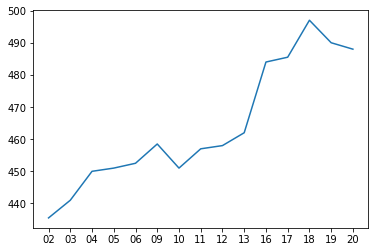

In [22]:
import matplotlib.pyplot as plt
plt.plot(df['日期1'], df['收盤價'])
